## Проект по теме "Прогнозирование наличия сердечно-сосудистых заболеваний на основе характеристик пациентов"

Датасет представляет собой .csv файл, содержащий следующие поля:

* id: идентификатор для каждого человека в наборе данных;
* age: возраст человека (в днях);
* gender: пол (1 для женщин, 2 для мужчин);
* height: рост в сантиметрах;
* weight: вес в килограммах;
* ap_hi: систолическое артериальное давление (измеряется в мм рт.ст.);
* ap_lo: диастолическое артериальное давление (измеряется в мм рт.ст.);
* cholesterol: уровень холестерина (1 – в норме, 2 – выше нормы, 3 –
значительно выше нормы);
* gluc: уровень глюкозы (1 – в норме, 2 – выше нормы, 3 – значительно выше
нормы);
* smoke: курит ли человек (0 – нет, 1 – да);
* alco: употребляет ли человек алкоголь (0 – нет, 1 – да);
* active: является ли человек физически активным (0 – нет, 1 – да);
* cardio: наличие сердечно-сосудистых заболеваний (0 – нет, 1 – да).

Задачей является построить модель, предсказывающую наличие сердечно-сосудистых заболеваний.
Вам необходимо реализовать все дальнейшие шаги, обучить модель и оценить её качество.

## Задание 1: загрузка файла и проверка пропущенных значений (5 баллов)

Откройте данные и изучите их: есть ли пропущенные значения? Прокомментируйте результат. Если пропущенные значения есть - удалите строки с ними.

In [14]:
# ваш код
import pandas as pd
import numpy as np
data = pd.read_csv('data/cvd.xls.csv')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [16]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [17]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#Находим количестов нулевых значений в столбцах
colls_null_proc = data.isnull().mean() * 100
print(colls_null_proc)

id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64


In [19]:
# ваш комментарий
#Провущенные значения отсутсвуют
#Нулевые знаения встречаются только в бинарных признаках и в столбце id

## Задание 2: проверка данных на мультиколлинеарность (15 баллов)

**2.1** Данные обязательно необходимо проверить на мультиколлинеарность: линейную взаимосвязь между признаками. Сначала проверим наличие чистой мультиколлинеарности. Для того, чтобы её идентифицировать - для начала посчитайте ранг для матрицы корреляций и ее определитель. Какой вывод можно сделать?

In [20]:
# ваш код
#Удалим столбец id
data = data.drop('id', axis=1)
#Считаем ранг матрицы корееляций - это количесвто столбцов
data.shape[1]

12

In [21]:
#Определяем матрицу кореляций
corr_matrix = data.corr()
print(corr_matrix)

                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.022811 -0.081515  0.053684  0.020764  0.017647   
gender      -0.022811  1.000000  0.499033  0.155406  0.006005  0.015254   
height      -0.081515  0.499033  1.000000  0.290968  0.005488  0.006150   
weight       0.053684  0.155406  0.290968  1.000000  0.030702  0.043710   
ap_hi        0.020764  0.006005  0.005488  0.030702  1.000000  0.016086   
ap_lo        0.017647  0.015254  0.006150  0.043710  0.016086  1.000000   
cholesterol  0.154424 -0.035821 -0.050226  0.141768  0.023778  0.024019   
gluc         0.098703 -0.020491 -0.018595  0.106857  0.011841  0.010806   
smoke       -0.047633  0.338135  0.187989  0.067780 -0.000922  0.005186   
alco        -0.029723  0.170966  0.094419  0.067113  0.001408  0.010601   
active      -0.009927  0.005866 -0.006570 -0.016867 -0.000033  0.004780   
cardio       0.238159  0.008109 -0.010821  0.181660  0.054475  0.065719   

             cholesterol

In [22]:
#Находим ранг нашей матрицы
rank = np.linalg.matrix_rank(corr_matrix)
print(rank)

12


In [24]:
#Найдём определитель нашей матрицы
det = np.linalg.det(corr_matrix)
print(det)

0.34680717001985695


In [25]:
#Определитель det близок к 0 что говорит о линейной зависимости между признаками

In [26]:
#Вывод: Из-за накопившихся погрешностей при делении не получилось выявить линейную зависиость по рангу
#Определителю матрицы показал что линейная зависимость присутствует

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

**2.2** Теперь проверьте мультиколлинеарность с помощью матрицы корреляций. Какие выводы можно сделать?

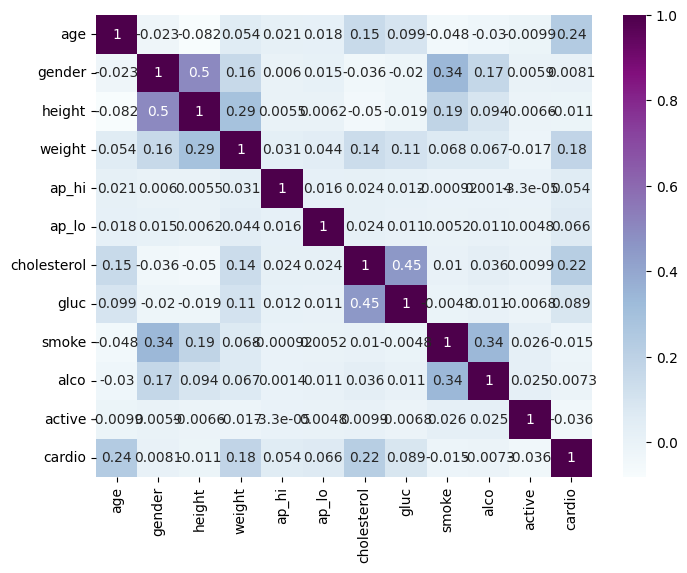

In [28]:
# ваш код
#Построим матрицу кореляций используя heatmap
correlation=data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='BuPu')
plt.show()

In [29]:
# ваш комментарий
# В нашем датасете присутсвует мультиколениарность Присутсвуют независимые признаки которые зависят друг от друга
#(коэфицент кореляции больше 0.2)
#Курение и рост сильно корелируют с полом
#Уровень холестерола сильно зависит от глюкозы
#Также есть признаки которые несильно корелируют с target(столбец cardio)
#Таким образом сильная корреляция больше 0.7 отсутствует

In [30]:
#выводим те признаки, у которых коэф.корреляции больше 0.2
hig_corr=data.corr()
hig_corr_features=hig_corr.index[abs(hig_corr['cardio'] >=0.2)]
hig_corr_features

Index(['age', 'cholesterol', 'cardio'], dtype='object')

In [31]:
#с признаком cardio кореллируют признаки: 'age', 'cholesterol'
#Также с cardio коррелирует признак 'weeight' Коэфицент кореляции 0.18

## Задание 3. Стандартизация (15 баллов)

Разделите данные на два массива: в переменную **Х** запишите массив признаков, а в переменную **y** - целевую переменную (cardio). Стандартизируйте массив признаков без использования готовых функций для стандартизации.

In [32]:
# ваш код
from os.path import join
from sklearn.neighbors import (KNeighborsRegressor,
                               KNeighborsClassifier)
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_error,
                             accuracy_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder,
                                   LabelEncoder)
from sklearn.pipeline import Pipeline


In [33]:
X = data.drop("cardio", axis=1)
y = data['cardio']

In [34]:
#Мы знаемм что стандартизация это преобразование массива данных таким образом что mean=0, а std=1
#Поэтому сначала производим центрирование с помощью mean() для каждого столбца
X_cent = X - X.mean()
#Затем каждый результат разделим норму от центрированного столбца(длинну вектора)
X_st = X_cent / np.linalg.norm(X_cent, axis=0)

In [35]:
#Проверим результат
X_st.describe().round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00
mean,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,-0.01,-0.00,-0.05,-0.02,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01
25%,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
50%,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
75%,0.00,0.01,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
max,0.01,0.01,0.04,0.03,0.39,0.22,0.01,0.01,0.01,0.02,0.00


Вычислите длину всех векторов - признаков. Прокомментируйте результат.

In [36]:
print(np.linalg.norm(X_st, axis=0))
# ваш комментарий
#Теперь каждый столбец имеет одинаковые стандартные отклонения и средние значения

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Задание 4. Решение задачи классификации. (20 баллов)

**4.1** Теперь приступим непосредственно к решению задачи классификации. Обучите наивный байесовский классификатор. Предварительно выберите один из его видов: поясните свой выбор.

In [37]:
# ваш код
#разделим данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
TRAIN_SIZE = 0.8
X_train, X_test, y_train, y_test = train_test_split(X_st, y, train_size=TRAIN_SIZE)

In [38]:
#Выбор класификатора:
#Нам подойдёт наивный байесовский классификатор Гаусса, т.к. большинство признаков непрерывные
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [39]:
#Обучаем классификатор
classifier.fit(X_train, y_train)

GaussianNB()

In [40]:
# ваш комментарий

**4.2** Оцените полученное качество и проинтерпретируйте полученный результат. Не забудьте разделить выборку на обучающую и тестовую части.

In [41]:
# ваш код
#Предскажем значения target для тестовой выборки
y_test_pred = classifier.predict(X_test)

In [42]:
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_error,
                             accuracy_score)

In [43]:
(y_test_pred == y_test.values).mean()  # accuracy

0.5866428571428571

In [44]:
y_test.value_counts(normalize=True) #расчиталем baseline

cardio
1    0.504214
0    0.495786
Name: proportion, dtype: float64

In [45]:
#Accuracy лишь немного выше baseline есть подозрение что модель чаще предсказывает только 0 либо 1

In [46]:
from sklearn.metrics import confusion_matrix

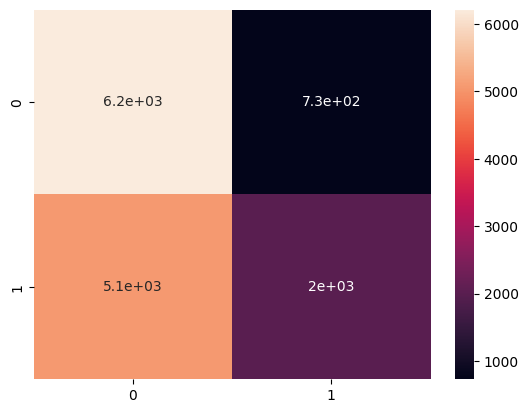

In [47]:
confussion= confusion_matrix(y_test, y_test_pred) #помимо accuracy, мы используем confussion matrix

sns.heatmap(confussion, annot=True)
plt.show()

In [48]:
# ваш комментарий
#Предсказание NB классификатора Гаусса оказалось недостаточно точным,
#Видим большое количество true и false negative и малоенькое true и false positive в матрице
#вероятно модель чаще предсказывала значение 0 для terget
#можно получить более точное предсказание

In [49]:
#Попоробуем использовать наивный байесовский классификатор Бернулли, т.к. таргет(cardio) имеет бинарные знаечения
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()

In [50]:
#Обучаем классификатор
classifier.fit(X_train, y_train)

BernoulliNB()

In [51]:
#Предскажем значения target для тестовой выборки
y_test_pred = classifier.predict(X_test)

In [52]:
(y_test_pred == y_test.values).mean()  # accuracy

0.7162857142857143

In [53]:
#Теперь точность значительно выше чем basseline

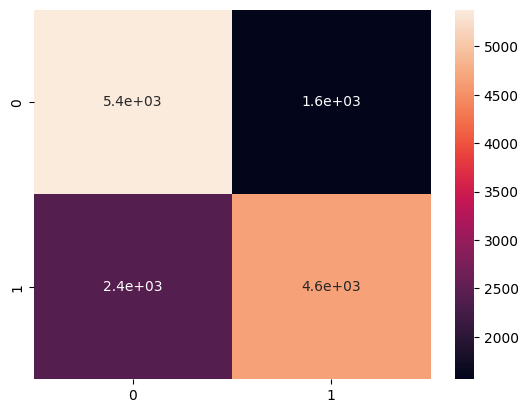

In [54]:
confussion= confusion_matrix(y_test, y_test_pred) #помимо accuracy, мы используем confussion matrix

sns.heatmap(confussion, annot=True)
plt.show()

In [55]:
#На confusion_matrix видим большое количество true positive и true negative
#Точность хорошая

## Задание 5: Решающее дерево (25 баллов)

Теперь решите задачу классификации с помощью обучающего дерева.

**5.1** Обучите дерево, не задавая никакие гиперпараметры. Выведите получившиеся гиперпараметры. Какое получилось качество? Сравните результат с предыдущей моделью.

In [56]:
# ваш код
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

In [57]:
#Обучаем классификатор
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
y_test_pred = model.predict(X_test)

In [59]:
(y_test_pred == y_test.values).mean()  # accuracy

0.6360714285714286

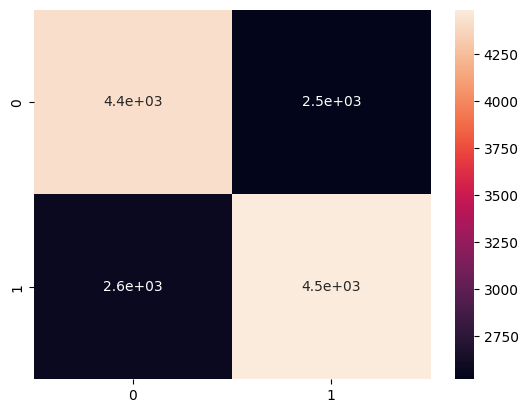

In [60]:
confussion= confusion_matrix(y_test, y_test_pred) #помимо accuracy, мы используем confussion matrix

sns.heatmap(confussion, annot=True)
plt.show()

In [61]:
#получим гиперпараметры
print('Current depth:', model.get_params())

Current depth: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [62]:
# ваш комментарий
#Тончость модели без ввода гиперпараметров оказалась ниже чем у NB классификатора Бернулли

**5.2** Подберите оптимальные гиперпараметры с помощью перебора по сетке. Обучите дерево с оптимальными гиперпараметрами. Изменилось ли качество?

In [63]:
# ваш код
#Сделаем перебор по сетке чтобы подобрать наилучшие гиперпараметры
#Используем метод GridSearchCV чтобы получить наилучшие параметры для модели используя тренировачные данные

In [64]:
param_grid = {
    'criterion': ['gini', 'entropy'],  #задаём сетку гиперпараметров
  'max_depth': [None, 5, 10],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

In [65]:
from sklearn.model_selection import GridSearchCV #GridSearch
grid_search = GridSearchCV(DecisionTreeClassifier(), 
                                                      param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [66]:
#Передадим гиперпараметры модели
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2, random_state=42)

In [67]:
#Обучаем классификатор
model.fit(X_train, y_train)
#предсказываем
y_test_pred = model.predict(X_test)

In [68]:
(y_test_pred == y_test.values).mean()  # accuracy

0.7367142857142858

In [69]:
# ваш комментарий
#Точность предсказания возрасла и немного лучше чем NB классификатор бернулли
#При этом значительно лучше классификатора Гаусса

**5.3** Выведите важность признаков. Какие три признака самые важные? Прокомментируйте результат.

In [70]:
# ваш код
importances = model.feature_importances_
print(importances)

[1.31332116e-01 0.00000000e+00 6.75861369e-04 6.26509779e-03
 7.69150025e-01 6.41352012e-03 7.58588879e-02 8.59718650e-03
 0.00000000e+00 0.00000000e+00 1.70730610e-03]


In [71]:
feature_names = list(X_train.columns) #интерпритируем данные
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)


        feature  importance
4         ap_hi    0.769150
0           age    0.131332
6   cholesterol    0.075859
7          gluc    0.008597
5         ap_lo    0.006414
3        weight    0.006265
10       active    0.001707
2        height    0.000676
1        gender    0.000000
8         smoke    0.000000
9          alco    0.000000


In [72]:
# ваш комментарий
#Первым по важности является признак "систолическое артериальное давление" 
# т.к. оно напрямую связано с работой сердца; отражает работы сердечной мышцы
#Вторым по важности ялвляется возраст, что обьяснимо преобладанием СС заболеваний у старшего поколения
#Тертим по важности явлется уровень холестерина, это скорее всего связано с образованием холестериновых бляшек при его высоком уровне
#что приводит к заболеваниям кровеносной системы(атеросклероз)

## Задание 6: Случайный лес и градиентный бустинг (20 баллов)

Осталось применить ансамблевые методы!

**6.1** Используйте случайный лес: без настройки и с подробом гиперпараметров по сетке. Какое качество получается в ситуации оптимальных гиперпараметров? Какие признаки самые важные? Сравнение результат с простым решающим деревом.

In [115]:
# ваш код
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [116]:
#предскажем target
y_test_pred = model.predict(X_test)

In [117]:
(y_test_pred == y_test.values).mean()  # accuracy

0.7187142857142857

In [74]:
# ваш комментарий
#Точность предскказания для случайного леса без гиперпараметров ниже чем у дерева решений с гиперпарметрами
#но немного ниже чем у дерева без них(почти такая же)

In [118]:
#получим параметры
print('Current depth:', model.get_params())

Current depth: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [119]:
#Зададим сетку гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV #импортируем RandomizedSearch для подбора гиперпараметров

In [123]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

c:\phython3.9\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\phython3.9\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\phython3.9\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\phython3.9\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\phython3.9\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in valida

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [124]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy',
 'class_weight': None}

In [125]:
random_search.best_score_

0.7346607142857142

In [126]:
#Передадим гиперпараметры нашей модели
model = RandomForestClassifier(n_estimators=200,
 min_samples_split=5,
 min_samples_leaf=4,
 max_features= 'sqrt',
 max_depth=10,
 criterion='entropy',
 class_weight=None)
model.fit(X_train, y_train)
#Предскажем target
y_test_pred = model.predict(X_test)
(y_test_pred == y_test.values).mean()  # accuracy


0.7395

In [ ]:
#Теперь тчность предсказания у случайного леса немного выше чем у дерева решений

**6.2** Аналогичные операции реализуйте для градиентного бустинга. Попробуйте хотя бы две разных реализации градиентного бустинга. Сравните итоговое качество со случайным деревом.

In [75]:
# ваш код
#Cначала попробуем использовать XGboost
!pip install xgboost




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
import xgboost as xgb
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание
y_test_pred = model.predict(X_test)

In [77]:
(y_test_pred == y_test.values).mean()  # accuracy

0.7402857142857143

In [ ]:
#Точность сырого XGBoost такая же как у случайного леса с гиперпараметрами

In [80]:
#Зададим сетку параметров
param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.3, 0.1, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [81]:
#Попробуем подобрать гиперпараметры используя gridSearch 
grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5) 
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50, 'subsample': 0.8}


In [84]:
#Передаём параметры нашей модели
model = xgb.XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8)

# Обучение модели
model.fit(X_train, y_train)

# Предсажем target
y_pred = model.predict(X_test)

In [85]:
(y_pred == y_test.values).mean()  # accuracy

0.7434285714285714

In [ ]:
#Видим небольшое улучшение точности

In [ ]:
# ваш комментарий
#XGBoost с гиперпараметрами немного точнее чем случайный лес

In [ ]:
#Теперь используем CatBoost
!pip install catboost

  Using cached catboost-1.2.7-cp39-cp39-win_amd64.whl.metadata (1.2 kB)
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
Using cached catboost-1.2.7-cp39-cp39-win_amd64.whl (101.8 MB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] Процесс не может получить доступ к файлу, так как этот файл занят другим процессом: 'c:\\phython3.9\\Lib\\site-packages\\catboost\\_catboost.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier()
model.fit(X_train, y_train)

cb_predict = model.predict(X_test)

accuracy_score(y_test, cb_predict)

Learning rate set to 0.057466
0:	learn: 0.6770000	total: 31.7ms	remaining: 31.7s
1:	learn: 0.6622111	total: 61.6ms	remaining: 30.7s
2:	learn: 0.6491999	total: 83.4ms	remaining: 27.7s
3:	learn: 0.6380372	total: 104ms	remaining: 25.8s
4:	learn: 0.6283767	total: 125ms	remaining: 24.9s
5:	learn: 0.6192784	total: 147ms	remaining: 24.4s
6:	learn: 0.6111873	total: 169ms	remaining: 24s
7:	learn: 0.6043684	total: 189ms	remaining: 23.5s
8:	learn: 0.5981694	total: 215ms	remaining: 23.6s
9:	learn: 0.5925977	total: 257ms	remaining: 25.5s
10:	learn: 0.5879467	total: 288ms	remaining: 25.9s
11:	learn: 0.5834579	total: 310ms	remaining: 25.5s
12:	learn: 0.5795323	total: 335ms	remaining: 25.4s
13:	learn: 0.5759752	total: 366ms	remaining: 25.8s
14:	learn: 0.5729585	total: 395ms	remaining: 26s
15:	learn: 0.5701200	total: 428ms	remaining: 26.3s
16:	learn: 0.5679604	total: 462ms	remaining: 26.7s
17:	learn: 0.5657627	total: 483ms	remaining: 26.3s
18:	learn: 0.5635001	total: 506ms	remaining: 26.1s
19:	learn: 0

0.7409285714285714

In [ ]:
#У сырого catboost точность такая же как у сырого XGBoost

In [107]:
#Задаём сетку гиперпараметров
param_grid = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.1, 0.05, 0.01],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'random_strength': [0.1, 1, 10], # сила рандомизации
    'border_count': [32, 64, 128]
}

In [108]:
random_search = RandomizedSearchCV(CatBoostClassifier(), #вызываем randomsearch
                                   param_grid) 
random_search.fit(X_train, y_train) 
print(random_search.best_estimator_)

0:	learn: 0.6905092	total: 48.5ms	remaining: 9.64s
1:	learn: 0.6879508	total: 70.3ms	remaining: 6.96s
2:	learn: 0.6855729	total: 101ms	remaining: 6.66s
3:	learn: 0.6831426	total: 128ms	remaining: 6.25s
4:	learn: 0.6808541	total: 152ms	remaining: 5.92s
5:	learn: 0.6787034	total: 174ms	remaining: 5.64s
6:	learn: 0.6766637	total: 204ms	remaining: 5.64s
7:	learn: 0.6742911	total: 233ms	remaining: 5.58s
8:	learn: 0.6719062	total: 262ms	remaining: 5.55s
9:	learn: 0.6697456	total: 302ms	remaining: 5.74s
10:	learn: 0.6677174	total: 344ms	remaining: 5.91s
11:	learn: 0.6656290	total: 371ms	remaining: 5.81s
12:	learn: 0.6636914	total: 395ms	remaining: 5.68s
13:	learn: 0.6617862	total: 421ms	remaining: 5.59s
14:	learn: 0.6600469	total: 445ms	remaining: 5.49s
15:	learn: 0.6581648	total: 472ms	remaining: 5.43s
16:	learn: 0.6563298	total: 516ms	remaining: 5.55s
17:	learn: 0.6544618	total: 549ms	remaining: 5.55s
18:	learn: 0.6527622	total: 575ms	remaining: 5.48s
19:	learn: 0.6510609	total: 609ms	remai

In [109]:
random_search.best_params_

{'random_strength': 0.1,
 'learning_rate': 0.1,
 'l2_leaf_reg': 3,
 'iterations': 500,
 'depth': 4,
 'border_count': 32}

In [110]:
random_search.best_score_

0.735625

In [111]:
#Передадим гиперпараметры нашей модели
model = CatBoostClassifier(random_strength=0.1,
 learning_rate=0.1,
 l2_leaf_reg=3,
 iterations=500,
 depth=4,
border_count=32)
model.fit(X_train, y_train)

cb_predict = model.predict(X_test)

accuracy_score(y_test, cb_predict)

0:	learn: 0.6658052	total: 53ms	remaining: 26.5s
1:	learn: 0.6440783	total: 101ms	remaining: 25.1s
2:	learn: 0.6265656	total: 155ms	remaining: 25.6s
3:	learn: 0.6127577	total: 194ms	remaining: 24.1s
4:	learn: 0.6018515	total: 214ms	remaining: 21.1s
5:	learn: 0.5928298	total: 230ms	remaining: 18.9s
6:	learn: 0.5862376	total: 245ms	remaining: 17.3s
7:	learn: 0.5800300	total: 260ms	remaining: 16s
8:	learn: 0.5751310	total: 288ms	remaining: 15.7s
9:	learn: 0.5709522	total: 317ms	remaining: 15.5s
10:	learn: 0.5672325	total: 346ms	remaining: 15.4s
11:	learn: 0.5645540	total: 367ms	remaining: 14.9s
12:	learn: 0.5618803	total: 383ms	remaining: 14.3s
13:	learn: 0.5595985	total: 398ms	remaining: 13.8s
14:	learn: 0.5575071	total: 415ms	remaining: 13.4s
15:	learn: 0.5559713	total: 432ms	remaining: 13.1s
16:	learn: 0.5545312	total: 447ms	remaining: 12.7s
17:	learn: 0.5532110	total: 465ms	remaining: 12.4s
18:	learn: 0.5521210	total: 485ms	remaining: 12.3s
19:	learn: 0.5511446	total: 511ms	remaining:

0.7407142857142858

In [ ]:
#Изменение гиперпараметров не повлияло на accuracy для catboost